# Mag TOV (7 Levels)

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Scaling

M/day
      G256: [ 1.08e+02, 5.14e+01, 1.59e+01]
      G128: [ 7.08e+03, 3.35e+03, 1.55e+03, 7.51e+02, 2.95e+02, 1.36e+02, 4.87e+01, 1.42e+01]
       G64: [ 1.05e+02, 4.48e+01, 1.40e+01]
Zcs/sec
      G256: [ 4.30e+09, 8.35e+09, 1.09e+10]
      G128: [ 2.35e+08, 4.45e+08, 8.23e+08, 1.61e+09, 2.81e+09, 5.30e+09, 7.70e+09, 1.06e+10]
       G64: [ 4.01e+09, 7.67e+09, 1.04e+10]
Efficiency
      G256: [ 1.00e+00, 9.70e-01, 6.32e-01]
      G128: [ 1.00e+00, 9.47e-01, 8.76e-01, 8.55e-01, 7.47e-01, 7.05e-01, 5.12e-01, 3.53e-01]
       G64: [ 1.00e+00, 9.57e-01, 6.50e-01]


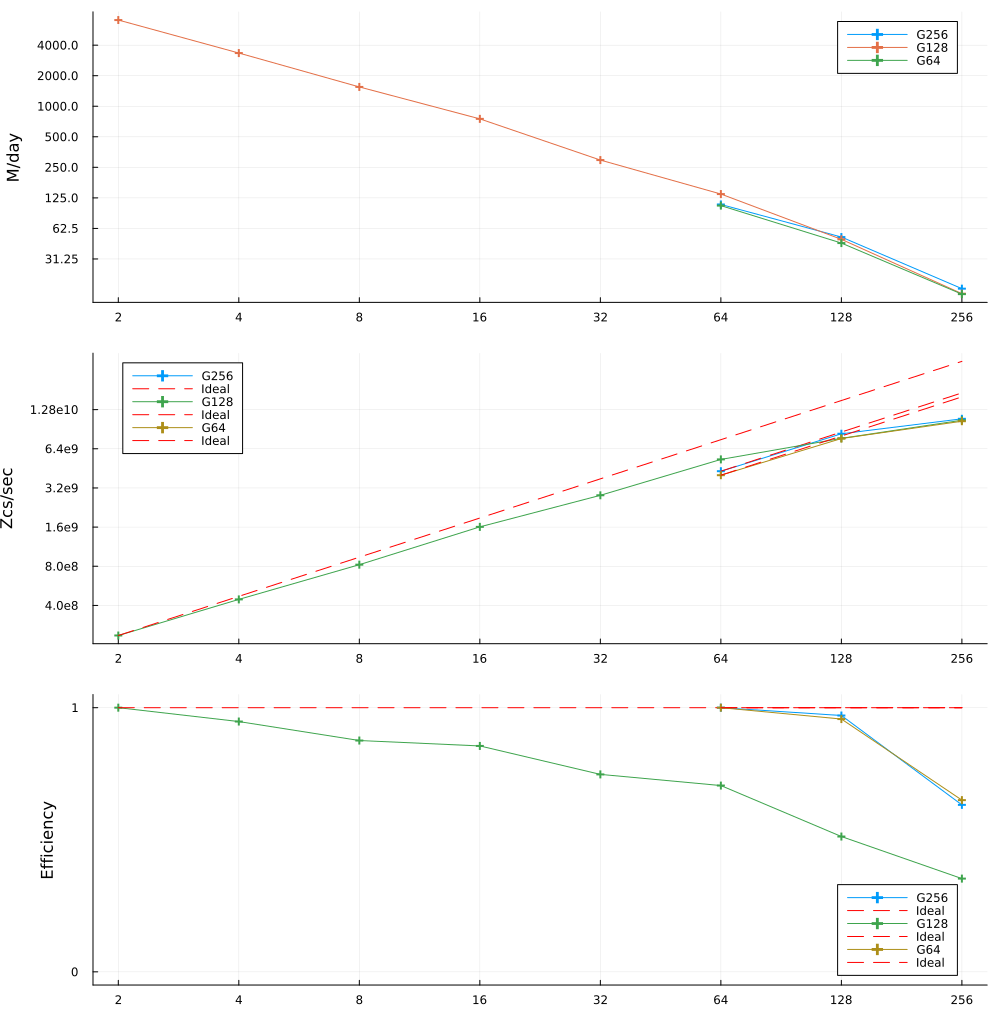

In [2]:
let patt_dirss = [
        ([
            (r"Z4c_L7_G256-N\d+-MPI\d+_r0000", "G256"),
        ], "../data/magTOV/Levels7/Weak", :cross),
        ([
            (r"Z4c_L7_G128-N\d+-MPI\d+_r0000", "G128"),
        ], "../data/magTOV/Levels7/Weak", :cross),
        ([
            (r"Z4c_L7_G64-N\d+-MPI\d+_r0000", "G64"),
        ], "../data/magTOV/Levels7/Weak", :cross),
    ]

    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [31.25, 62.5, 125, 250, 500, 1000, 2000, 4000]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime", is_plot_ideal=false, is_print_value=true)

    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [4e8, 8e8, 1.6e9, 3.2e9, 6.4e9, 1.28e10]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)
    
    # Plot Efficiency
    plt3 = plot(ylabel="Efficiency", xscale=:log10, ylim=(-0.05,1.05))
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt3, xs, [string(n) for n in xs])
    ys = [0, 1]
    yticks!(plt3, ys, [string(n) for n in ys])
    println("Efficiency")
    Misc.plot_efficiency(plt3, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)

    # Sum
    plt = plot(plt1, plt2, plt3, layout=(3,1), size = (1000, 1024))
    display(plt)
end

## Speed

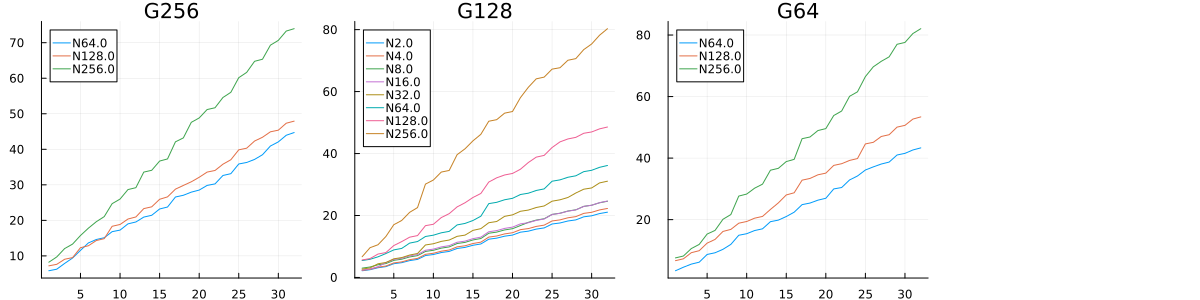

In [3]:
let patt_dirss = [
        ([
            (r"Z4c_L7_G256-N\d+-MPI\d+_r0000", "G256"),
        ], "../data/magTOV/Levels7/Weak", :cross),
        ([
            (r"Z4c_L7_G128-N\d+-MPI\d+_r0000", "G128"),
        ], "../data/magTOV/Levels7/Weak", :cross),
        ([
            (r"Z4c_L7_G64-N\d+-MPI\d+_r0000", "G64"),
        ], "../data/magTOV/Levels7/Weak", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end